In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
train=pd.read_csv('DailyDelhiClimateTrain.csv')
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
test=pd.read_csv('DailyDelhiClimateTest.csv')
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
train=train[['date', 'meantemp']].copy()
test=test[['date', 'meantemp']].copy()
test = test.head(100).copy()

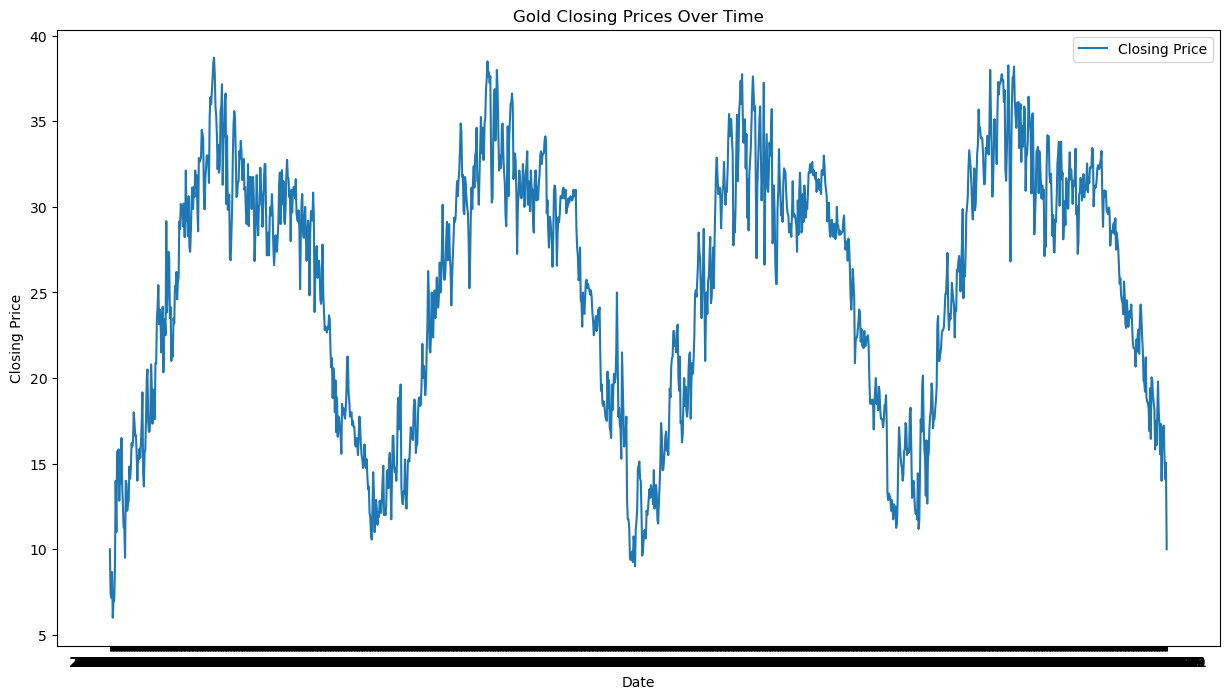

In [5]:
# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(train['date'], train['meantemp'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.legend()
plt.show()

In [17]:
import numpy as np
# Tính chuỗi return
r_t = np.log(train['meantemp']/train['meantemp'].shift(1)).values
r_t_test = np.log(test['meantemp']/test['meantemp'].shift(1)).values

In [22]:
np.info(r_t_test)

class:  ndarray
shape:  (100,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x2bee09c10f0
byteorder:  little
byteswap:  False
type: float64


In [19]:
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]

array([-9.11887495e-19, -3.01105093e-01, -3.20393537e-02,  1.90043603e-01,
       -3.67724780e-01])

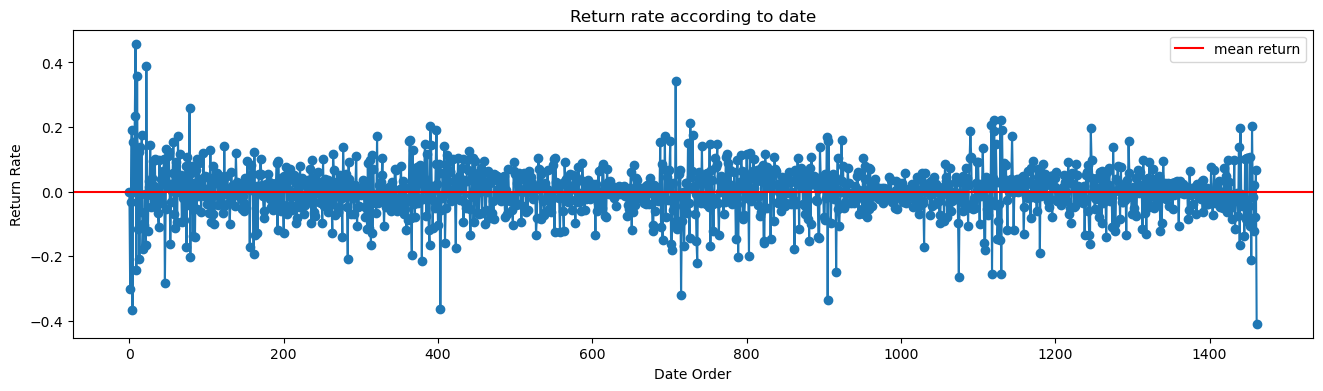

In [20]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

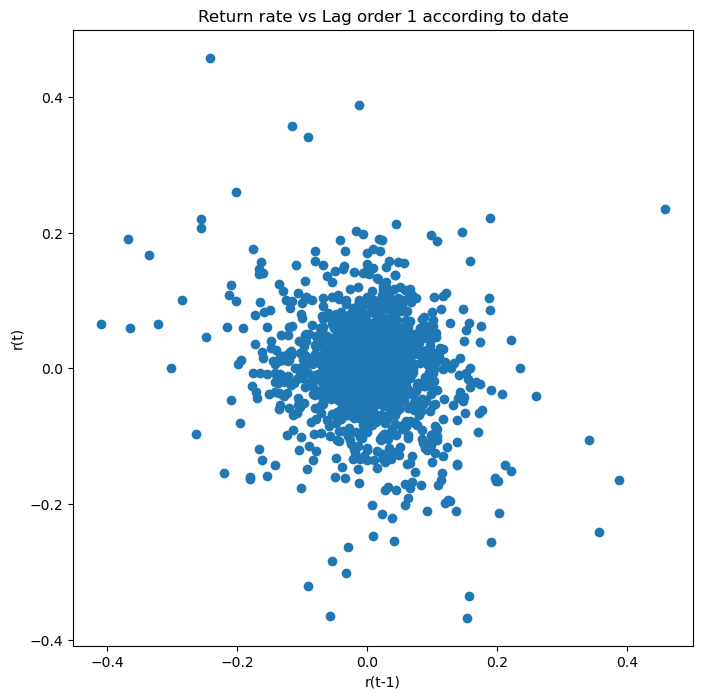

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Lag order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(r_t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.106675
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [11]:
import pmdarima as pm
auto_arima_model = pm.auto_arima(r_t, 
                                 start_p=1, start_q=1, 
                                 max_p=5, max_q=5, 
                                 seasonal=False,  # Không có mùa vụ
                                 trace=True,  
                                 stepwise=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3484.371, Time=3.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3405.790, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3448.005, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3456.257, Time=1.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3483.729, Time=6.92 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3483.542, Time=10.00 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3465.266, Time=5.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3453.618, Time=1.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3485.916, Time=7.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-3484.152, Time=7.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-3484.113, Time=10.68 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3483.848, Time=12.82 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3484.090, Time=11.00 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-3482.115, Time=17.94 sec
 ARIMA(2,0,2)(

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model (replace order with the desired (p, d, q))
model_arima = SARIMAX(r_t, order=(2, 0, 2))
model_fit = model_arima.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(2, 0, 2)   Log Likelihood                1747.958
Date:                Thu, 10 Oct 2024   AIC                          -3485.916
Time:                        19:54:39   BIC                          -3459.478
Sample:                             0   HQIC                         -3476.054
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2737      0.103     -2.650      0.008      -0.476      -0.071
ar.L2          0.5428      0.056      9.741      0.000       0.434       0.652
ma.L1          0.0616      0.106      0.582      0.5

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

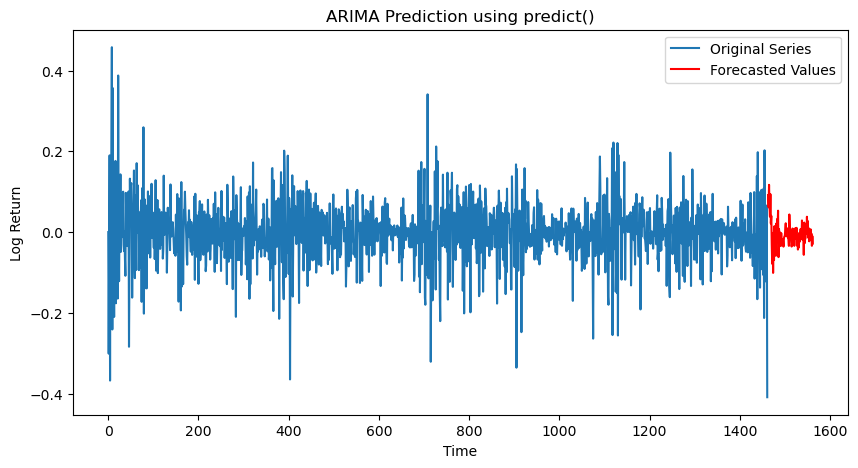

In [25]:
history = [x for x in r_t]
predictions = list()

# walk-forward validation
for t in range(len(r_t_test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = r_t[t]
    history.append(obs)

# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(r_t)), r_t, label="Original Series")
plt.plot(np.arange(len(r_t)+1, len(r_t) + len(r_t_test)+1), predictions, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [26]:
# Assuming the first known value in meantemp is the first element
original_meantemp = np.zeros(len(predictions) + 1)

# The first value of the original series is known
original_meantemp[0] = train['meantemp'].iloc[0]

# Reverse the log returns to reconstruct the original series
for t in range(1, len(original_meantemp)):
    original_meantemp[t] = original_meantemp[t-1] * np.exp(predictions[t-1])

# Convert back to a pandas Series for easier handling
original_meantemp_series = pd.Series(original_meantemp[1:], name='Reconstructed Meantemp')

# Display the first few reconstructed values
print(original_meantemp_series.head())

0    10.961460
1    11.656088
2    13.102982
3    14.004654
4    14.552005
Name: Reconstructed Meantemp, dtype: float64


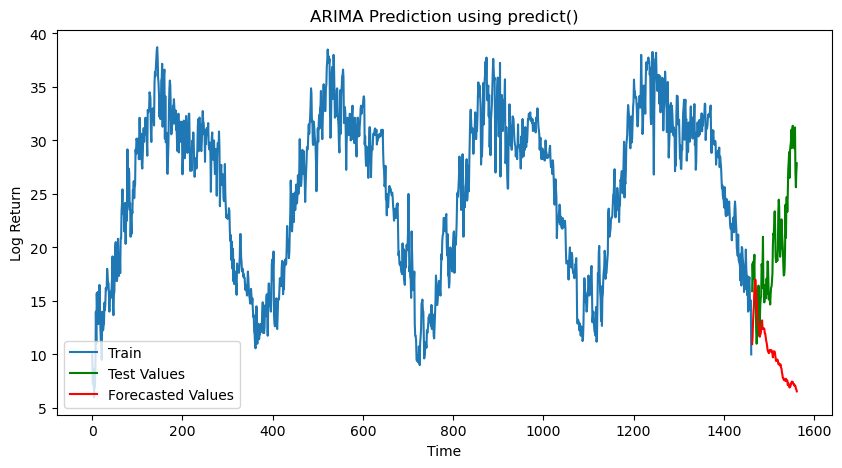

In [28]:
# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train)), train['meantemp'], label="Train")
plt.plot(np.arange(len(train)+1, len(train) + 1 + len(test)), test['meantemp'], label="Test Values", color='green')
plt.plot(np.arange(len(train)+1, len(train) + 1 + len(original_meantemp_series)), original_meantemp_series, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [29]:
# Evaluate the model with additional metrics
# MSE
mse = mean_squared_error(test['meantemp'], original_meantemp_series)

# RMSE
rmse = mse ** 0.5

# MAE
mae = mean_absolute_error(test['meantemp'], original_meantemp_series)

# MAPE
mape = np.mean(np.abs((test['meantemp'] - original_meantemp_series) / test['meantemp'])) * 100

# R-squared
r2 = r2_score(test['meantemp'], original_meantemp_series)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 160.23470094103175
Root Mean Squared Error (RMSE): 12.6583846102507
Mean Absolute Error (MAE): 10.527785970184157
Mean Absolute Percentage Error (MAPE): 46.82%
R-squared (R²): -4.621128706984578
